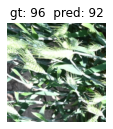

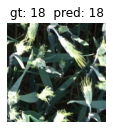

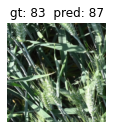

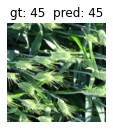

In [8]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy
from tqdm import tqdm

from dataset import M1Data

def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated
    
cudnn.benchmark = True
plt.ion()   # interactive mode

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

def visualize_model(model, vis_dataloader, device, num_images):
    #was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        #tbar = tqdm(enumerate(vis_dataloader), total=len(vis_dataloader))
        #for idx, (inputs, labels) in tbar:
        for i, (inputs, labels) in enumerate(vis_dataloader):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('gt: {}  pred: {}'.format(labels[j], preds[j]))
                imshow(inputs.cpu().data[j])

                if images_so_far == num_images:
                    #model.train(mode=was_training)
                    return
        #model.train(mode=was_training)


num_classes = 116
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_ft = models.resnet18(pretrained=False)
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, num_classes)
model_ft.load_state_dict(torch.load('/home/baker/Work/Codes/Python/imageClassifier/best_model.pth'))
model_ft = model_ft.to(device)
excel_dir = '/home/baker/Work/data/raw_data/M1/excels/'
root_dir = '/home/baker/Work/data/raw_data/M1/Z7II'
new_label_file = '/home/baker/Work/data/raw_data/M1/excels/field_cultivar_phenptypes.json'
test_file = os.path.join(excel_dir, 'test.txt')
test_dataset = M1Data(test_file, new_label_file, root_dir, data_transforms['val'])
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=4, shuffle=True, num_workers=1)
    
visualize_model(model_ft, test_dataloader, device, 4)


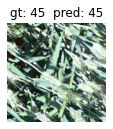

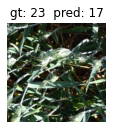

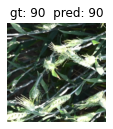

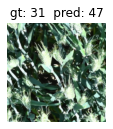

In [9]:
visualize_model(model_ft, test_dataloader, device, 4)

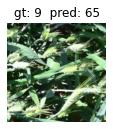

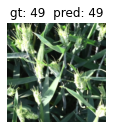

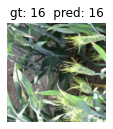

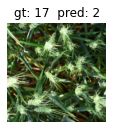

In [10]:
visualize_model(model_ft, test_dataloader, device, 4)

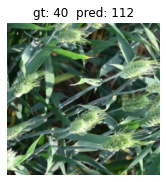

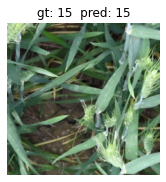

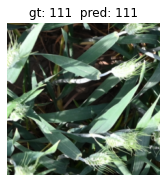

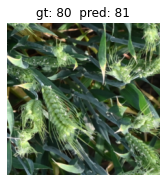

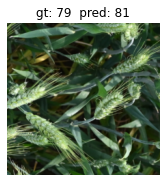

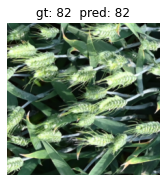

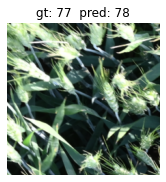

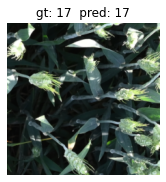

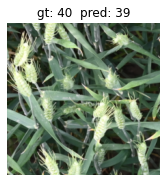

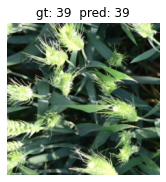

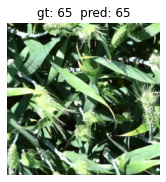

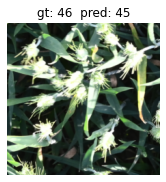

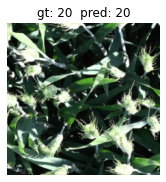

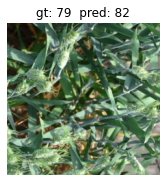

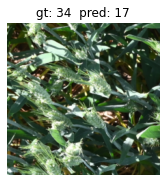

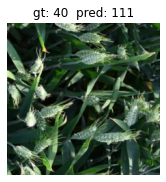

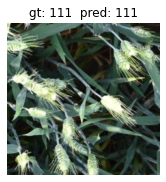

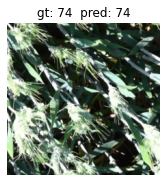

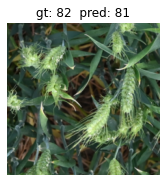

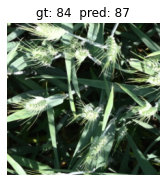

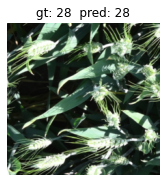

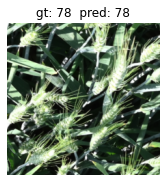

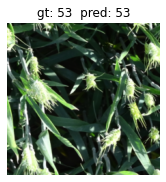

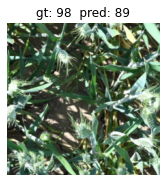

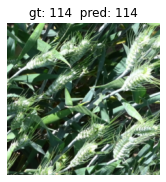

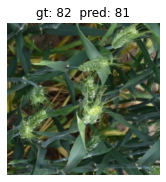

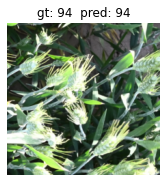

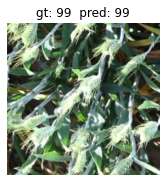

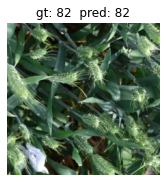

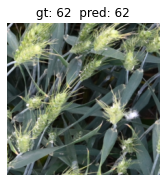

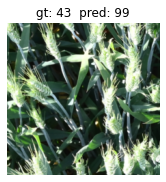

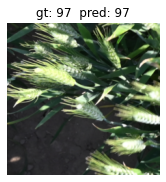

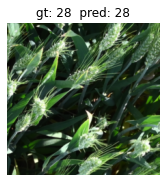

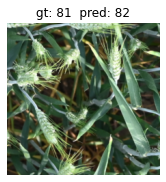

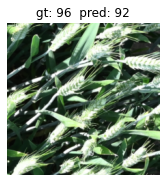

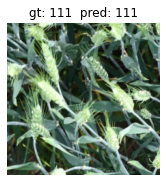

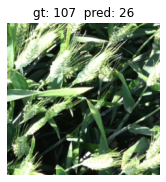

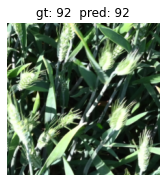

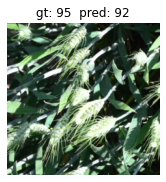

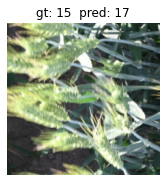

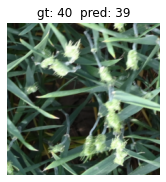

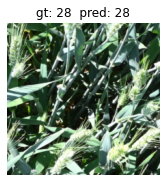

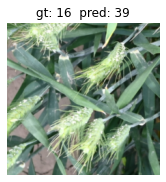

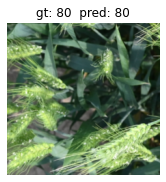

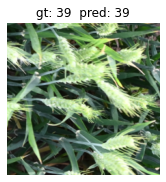

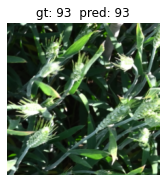

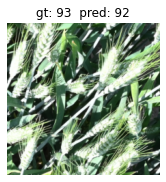

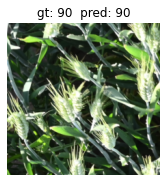

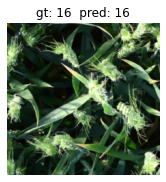

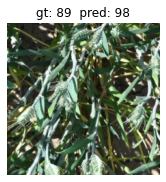

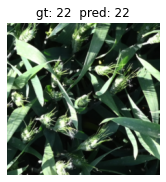

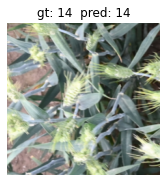

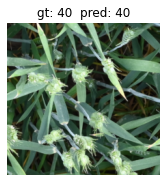

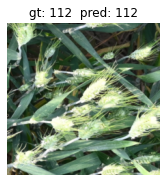

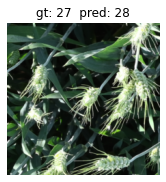

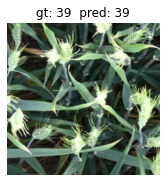

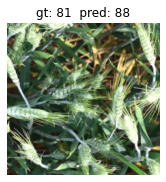

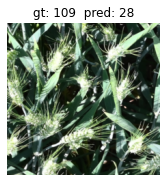

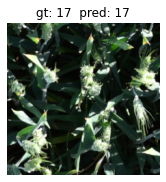

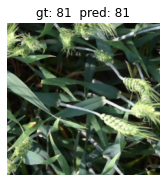

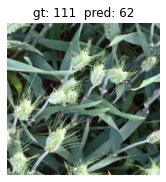

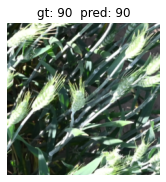

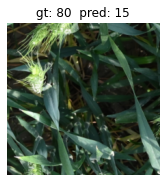

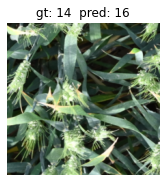

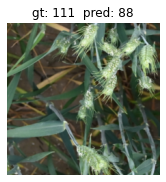

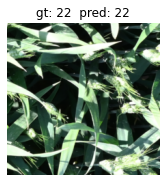

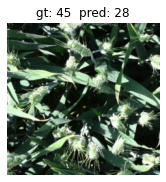

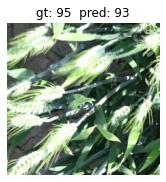

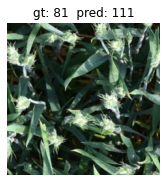

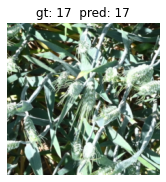

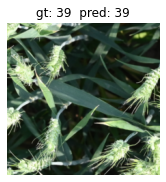

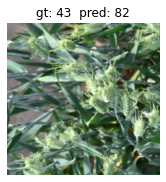

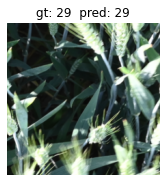

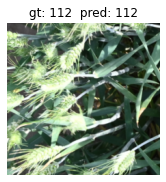

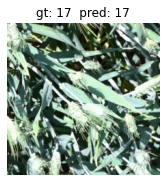

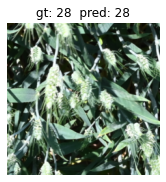

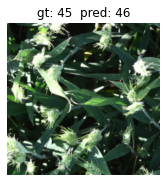

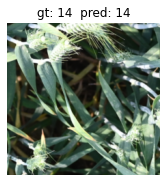

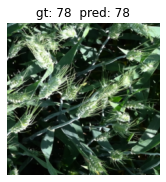

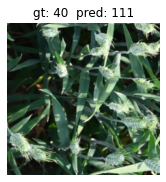

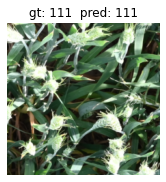

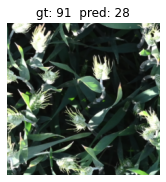

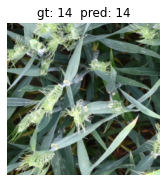

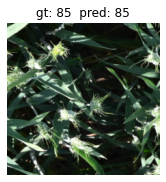

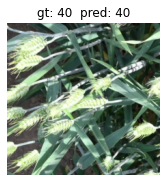

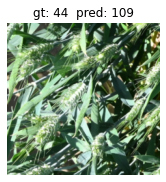

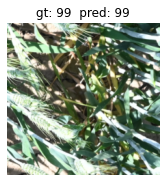

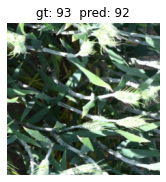

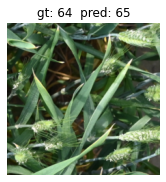

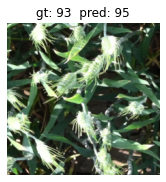

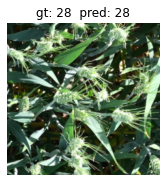

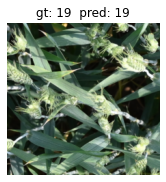

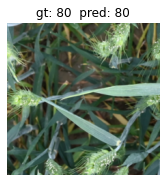

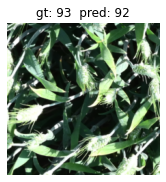

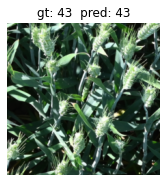

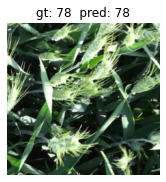

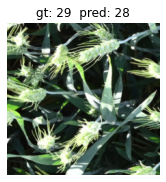

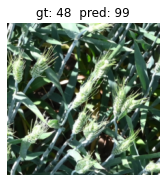

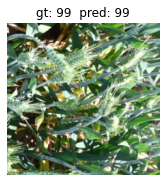

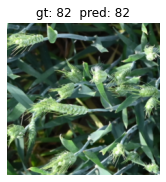

In [11]:
for i in range(50):
    visualize_model(model_ft, test_dataloader, device, 2)